In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

df = pd.read_csv("treeData.csv", low_memory=False) 
df.head(10)

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,2,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,3,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,4,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,5,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
5,6,1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45.0,18.0,35.0,3.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477496,-79.924568
6,7,239290336,5503,BRYANT ST,Dogwood: Corneliancherry,Cornus mas,8.0,4.0,99.0,3.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478403,-79.925985
7,8,1233652274,1207,KING AVE,Maple: Norway,Acer platanoides,27.0,10.0,30.0,3.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478404,-79.926126
8,9,1477030894,1201,KING AVE,Maple: Norway,Acer platanoides,35.0,12.0,3.0,3.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478314,-79.926161
9,10,1484901843,1456,WOODBINE ST,Maple: Norway,Acer platanoides,NaN,NaN,NaN,NaN,...,Stanton Heights,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,40.485240,-79.936390


This chart is the visual data behind the tree data in Pittsburgh. It shows data such as the ID of the trees, the street they're on, the common and scientific names of the tree, the neighborhood they're in, and other data.

In [91]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['_id', 'id', 'address_number', 'street', 'common_name',
       'scientific_name', 'height', 'width', 'growth_space_length',
       'growth_space_width', 'growth_space_type', 'diameter_base_height',
       'stems', 'overhead_utilities', 'land_use', 'condition',
       'stormwater_benefits_dollar_value', 'stormwater_benefits_runoff_elim',
       'property_value_benefits_dollarvalue',
       'property_value_benefits_leaf_surface_area',
       'energy_benefits_electricity_dollar_value',
       'energy_benefits_gas_dollar_value',
       'air_quality_benfits_o3dep_dollar_value',
       'air_quality_benfits_o3dep_lbs',
       'air_quality_benfits_vocavd_dollar_value',
       'air_quality_benfits_vocavd_lbs',
       'air_quality_benfits_no2dep_dollar_value',
       'air_quality_benfits_no2dep_lbs',
       'air_quality_benfits_no2avd_dollar_value',
       'air_quality_benfits_no2avd_lbs',
       'air_quality_benfits_so2dep_dollar_value',
       'air_quality_benfits_so2dep_lbs',
       'a

This is a list of all the the column names in the CSV. It makes it easy to find and copy/paste the column titles I need later on in this project without having to go into the file and scroll through it manually. 

In [ ]:
counter = dict()
for row in df["neighborhood"]:

    if row not in counter:
        counter[row] = 1
    else:
        counter[row] = counter[row] + 1
print(counter)
len(counter)

This is a record of all the neighborhoods and the number of trees the have.

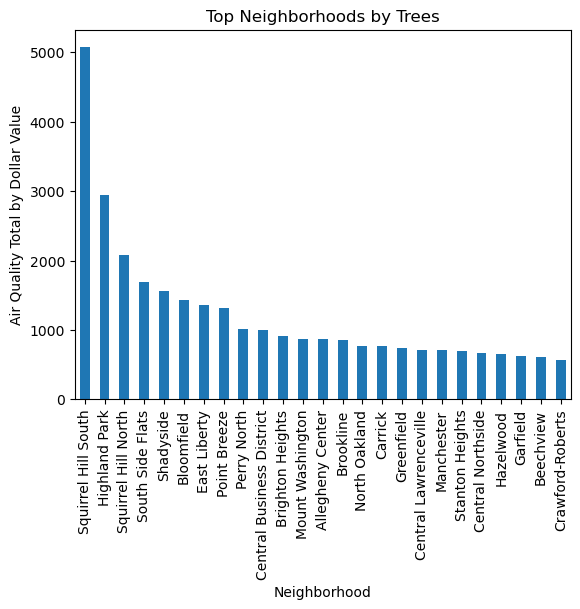

In [159]:
# Plot only the top 10 neighborhoods by length of sidewalk
#df_filtered = df[df['LengthMile'] < 1000] 
#df_top25 = df_filtered.groupby('Neighborho')['LengthMile'].sum().nlargest(25).reset_index()
#df_top25.plot(kind='bar', x='Neighborho', y='LengthMile', legend=False)

df = pd.DataFrame(list(counter.items()), columns = ['neighborhood', 'air_quality_benfits_total_dollar_value'])
df_filtered = df[df['air_quality_benfits_total_dollar_value'] > 500]

df_top = df_filtered.groupby('neighborhood')['air_quality_benfits_total_dollar_value'].sum().nlargest(25).reset_index()
df_top.plot(kind = 'bar', x = 'neighborhood', y = "air_quality_benfits_total_dollar_value", legend = False)

plt.title('Top Neighborhoods by Trees')
plt.xlabel('Neighborhood')
plt.ylabel('Air Quality Total by Dollar Value')
plt.show()

This is a bar containing the top 25 neighborhoods in terms of tree count. Having all of them would be chaotic.

<Axes: >

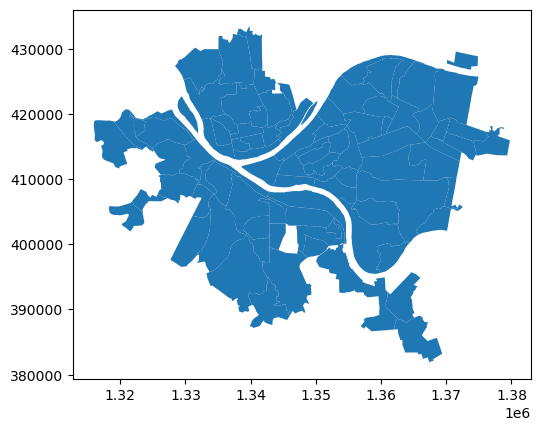

In [99]:
neighborhoods = gpd.read_file("Neighborhoods_.shp")
neighborhoods.plot() 

This is just the basic geoplot of Pittsburgh.

In [143]:
trees = pd.read_csv("treeData.csv", low_memory = False)
num_trees = trees.groupby("neighborhood").sum()['air_quality_benfits_total_dollar_value']
num_trees.sort_values(ascending=False)

neighborhood
Squirrel Hill South    46379.727424
Highland Park          27781.014184
Squirrel Hill North    23199.064989
Point Breeze           12034.065545
Allegheny Center       10723.002809
                           ...     
East Carnegie             34.018916
Esplen                    10.137249
Glen Hazel                 3.351190
South Shore                2.380994
Hays                       1.699988
Name: air_quality_benfits_total_dollar_value, Length: 90, dtype: float64

This is data explaning the value of all the trees in some of the neighborhoods. 

In [145]:
tree_map = neighborhoods.merge(num_trees, how='left', left_on='hood', right_on='neighborhood')
tree_map[['hood','air_quality_benfits_total_dollar_value']].head(10)

,hood,air_quality_benfits_total_dollar_value
0,Point Breeze North,3582.382909
1,Squirrel Hill North,23199.064989
2,Garfield,2590.777154
3,Bedford Dwellings,661.732149
4,Knoxville,3115.438428
5,Homewood South,1920.672857
6,Middle Hill,990.420586
7,Oakwood,728.306891
8,North Oakland,4921.847678
9,Duquesne Heights,414.353076


This the chart format of that data. 

<Axes: >

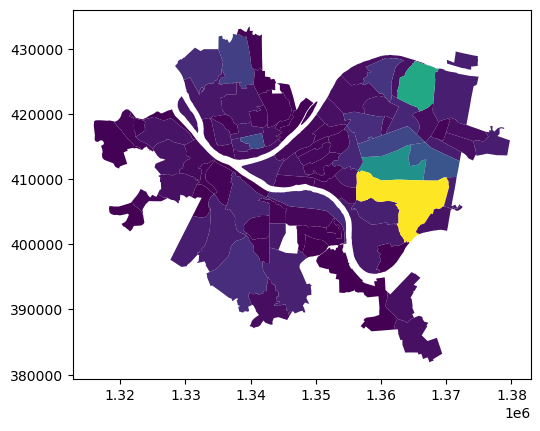

In [147]:
tree_map.plot(column='air_quality_benfits_total_dollar_value')

This is map plot of the former dataset. We saw that the Squirrel Hill North Neighborhood had the most value by a large margin and that 
everything else fel off, so this wasn't a surprise. 

<Axes: >

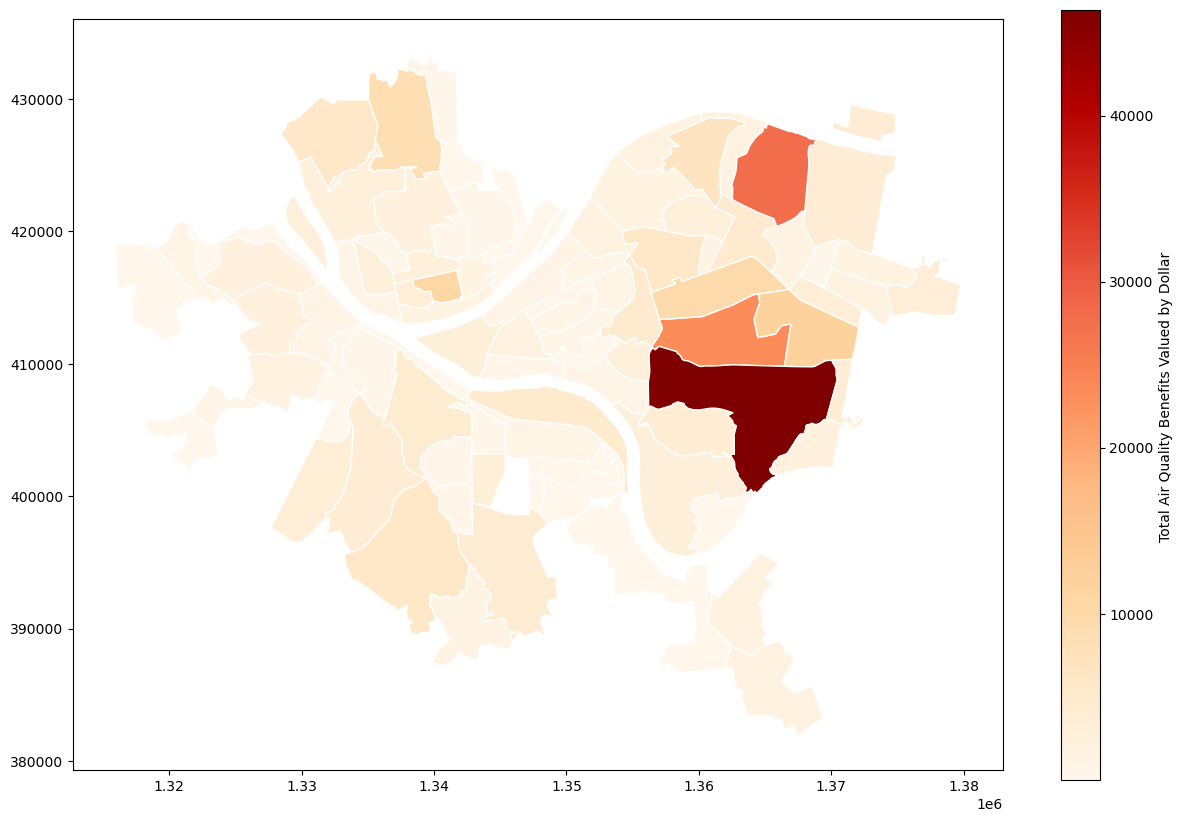

In [151]:
tree_map.plot(column='air_quality_benfits_total_dollar_value', 
               cmap='OrRd',             
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Total Air Quality Benefits Valued by Dollar "}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
               )

This is anothe map of the same data, but in another color. 